In [ ]:
!pip install patchify
!pip install opencv-python
!pip install keras==2.12.0rc1 --user
!pip install tensorflow==2.12.0rc1 --user
#!pip install tensorflow keras
#!pip install --upgrade tensorflow
#!pip install --upgrade keras
!pip install -U -q segmentation-models
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.12.0rc1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

Mount to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_directory = '/content/gdrive/MyDrive/TugasAkhir'

patch_size = 128
#was 256

In [ ]:
import tensorflow as tf

tf.constant(1, dtype=tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

Data Preparation

In [ ]:
image_dataset = []
counter = 0  # Initialize counter

for path, subdirs, files in os.walk(root_directory):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'all_images_wiener_revisi':
        images = os.listdir(path)
        images.sort()
        for i, image_name in enumerate(images):
            if image_name.endswith(".jpg"):
                image = cv2.imread(path+"/"+image_name, 1)
                SIZE_X = (image.shape[1]//patch_size)*patch_size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size
                image = Image.fromarray(image)
                image = np.array(image)
                patches_img = patchify(image, (256, 512, 3), step=patch_size)
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        single_patch_img = patches_img[i, j, :, :]
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        single_patch_img = single_patch_img[0]
                        image_dataset.append(single_patch_img)

                counter += 1  # Increment counter after processing each image
                if counter == 5000:  # Check if the counter reaches 5000
                    break  # Stop the loop

    if counter == 5000:
        break  # Stop the outer loop as well

print("Total images processed:", counter)


Total images processed: 5000


In [ ]:
""" image_dataset = []
for path, subdirs, files in os.walk(root_directory):
    #print(path)
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'all_images':   #Find all 'images' directories
        images = os.listdir(path)  #List of all image names in this subdirectory
        images.sort()
        for i, image_name in enumerate(images):
               #print(image_name)
            if image_name.endswith(".jpg"):   #Only read jpg images...
               #print(image_name)

                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
                #count = len(image)
                #print(count)
                #print(image)
                SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                image = Image.fromarray(image)
                #image = image.crop((0 ,0 , SIZE_X, SIZE_Y))  #Crop from top left corner
                #image = image.resize((256, 128))  #Try not to resize for semantic segmentation
                image = np.array(image)

                #Extract patches from each image
                #print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (256, 512, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
                #patches_img = patchify(image, (64, 64, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):

                        single_patch_img = patches_img[i,j,:,:]

                        #Use minmaxscaler instead of just dividing by 255.
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        #single_patch_img = (single_patch_img.astype('float32')) / 255.
                        single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.
                        image_dataset.append(single_patch_img)
"""

' image_dataset = []\nfor path, subdirs, files in os.walk(root_directory):\n    #print(path)\n    dirname = path.split(os.path.sep)[-1]\n    if dirname == \'all_images\':   #Find all \'images\' directories\n        images = os.listdir(path)  #List of all image names in this subdirectory\n        images.sort()\n        for i, image_name in enumerate(images):\n               #print(image_name)\n            if image_name.endswith(".jpg"):   #Only read jpg images...\n               #print(image_name)\n\n                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR\n                #count = len(image)\n                #print(count)\n                #print(image)\n                SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size\n                SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size\n                image = Image.fromarray(image)\n                #image = image.crop((0 ,0 , SIZ

In [ ]:
print(images)

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '101.jpg', '1010.jpg', '1011.jpg', '1012.jpg', '1013.jpg', '1014.jpg', '1015.jpg', '1016.jpg', '1017.jpg', '1018.jpg', '1019.jpg', '102.jpg', '1020.jpg', '1021.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1026.jpg', '1027.jpg', '1028.jpg', '1029.jpg', '103.jpg', '1030.jpg', '1031.jpg', '1032.jpg', '1033.jpg', '1034.jpg', '1035.jpg', '1036.jpg', '1037.jpg', '1038.jpg', '1039.jpg', '104.jpg', '1040.jpg', '1041.jpg', '1042.jpg', '1043.jpg', '1044.jpg', '1045.jpg', '1046.jpg', '1047.jpg', '1048.jpg', '1049.jpg', '105.jpg', '1050.jpg', '1051.jpg', '1052.jpg', '1053.jpg', '1054.jpg', '1055.jpg', '1056.jpg', '1057.jpg', '1058.jpg', '1059.jpg', '106.jpg', '1060.jpg', '1061.jpg', '1062.jpg', '1063.jpg', '1064.jpg', '1065.jpg', '1066.jpg', '1067.jpg', '1068.jpg', '1069.jpg', '107.jpg', '1070.jpg', '1071.jpg', '1072.jpg', '1073.jpg', '107

In [ ]:
mask_dataset = []
counter = 0  # Initialize counter

for path, subdirs, files in os.walk(root_directory):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'all_masks_revisi':
        masks = os.listdir(path)
        masks.sort()
        for i, mask_name in enumerate(masks):
            if mask_name.endswith(".png"):
                mask = cv2.imread(path+"/"+mask_name, 3)
                mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size
                mask = Image.fromarray(mask)
                mask = np.array(mask)
                patches_mask = patchify(mask, (256, 512, 3), step=patch_size)
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        single_patch_mask = patches_mask[i, j, :, :]
                        single_patch_mask = single_patch_mask[0]
                        mask_dataset.append(single_patch_mask)

                counter += 1  # Increment counter after processing each mask
                if counter == 5000:  # Check if the counter reaches 5000
                    break  # Stop the loop

    if counter == 5000:
        break  # Stop the outer loop as well

print("Total masks processed:", counter)


Total masks processed: 5000


In [ ]:
"""
mask_dataset = []
for path, subdirs, files in os.walk(root_directory):
    #print(path)
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'all_masks':   #Find all 'images' directories
        masks = os.listdir(path)  #List of all image names in this subdirectory
        masks.sort()
        for i, mask_name in enumerate(masks):
            if mask_name.endswith(".png"):   #Only read png images... (masks in this dataset)

                mask = cv2.imread(path+"/"+mask_name, 3)  #Read each image as Grey (or color but remember to map each color to an integer)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                #print(mask)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                #mask = mask.crop((0 , 0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((256, 128))  #Try not to resize for semantic segmentation
                mask = np.array(mask)

                #Extract patches from each image
                #print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (256, 512, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
                #patches_mask = patchify(image, (64, 64, 3), step=patch_size)  #Step=256 for 256 patches means no overlap

                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):

                        single_patch_mask = patches_mask[i,j,:,:]
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                        single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.
                        mask_dataset.append(single_patch_mask)
"""

'\nmask_dataset = []\nfor path, subdirs, files in os.walk(root_directory):\n    #print(path)\n    dirname = path.split(os.path.sep)[-1]\n    if dirname == \'all_masks\':   #Find all \'images\' directories\n        masks = os.listdir(path)  #List of all image names in this subdirectory\n        masks.sort()\n        for i, mask_name in enumerate(masks):\n            if mask_name.endswith(".png"):   #Only read png images... (masks in this dataset)\n\n                mask = cv2.imread(path+"/"+mask_name, 3)  #Read each image as Grey (or color but remember to map each color to an integer)\n                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)\n                #print(mask)\n                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size\n                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size\n                mask = Image.fromarray(mask)\n                #mask = mask.crop((0 , 0, SIZE_X, SIZE_Y

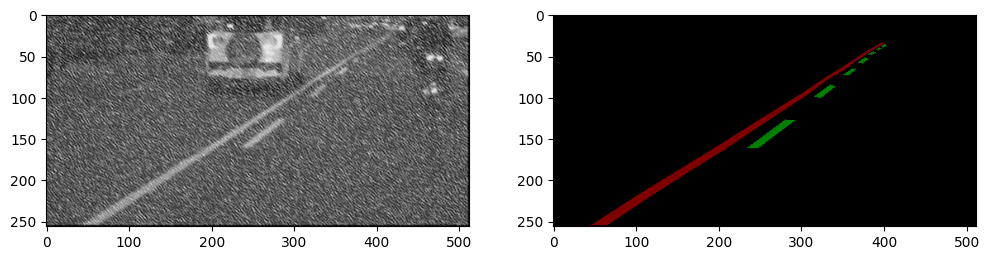

In [ ]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (256, 512, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (256, 512, 3)))
plt.show()

In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset =  np.array(mask_dataset)

In [ ]:
image_dataset.shape

(5000, 256, 512, 3)

RGB Label

In [ ]:

import random
import numpy as np
import matplotlib.pyplot as plt

# Define the custom color map
cmap = plt.cm.colors.ListedColormap(['black', 'red', 'green'])


Background = np.array([0,0,0])
ContinueLine = np.array([128,0,0])
DashedLine = np.array([0,128,0])

def rgb_to_2D_label(label):

    label_seg = np.empty((label.shape[0], label.shape[1], 3), dtype=np.uint8)

    label_seg[(label == 0)] = Background
    label_seg[(label == 1)] = ContinueLine
    label_seg[(label == 2)] = DashedLine

    label_seg = label_seg.astype(np.uint8)

    for i in range(mask_dataset.shape[0]):
        for j in range(mask_dataset.shape[1]):
            label = label[i, j]
            label_seg[i, j] = rgb_to_2D_label[label]

    return(label_seg)

In [ ]:
label = single_patch_mask

# Now replace RGB to integer values to be used as labels.
#Find pixels with combination of RGB for the above defined arrays...
#if matches then replace all values in that pixel with a specific integer
def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format.
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Background ,axis=-1)] = 0
    label_seg [np.all(label== ContinueLine ,axis=-1)] = 1
    label_seg [np.all(label== DashedLine ,axis=-1)] = 2

    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels

    return label_seg

In [ ]:
    labels = []
    for i in range(mask_dataset.shape[0]):
        label = rgb_to_2D_label(mask_dataset[i])
        labels.append(label)

    labels = np.array(labels)
    labels = np.expand_dims(labels, axis=3)


    print("Unique labels in label dataset are: ", np.unique(labels))

Unique labels in label dataset are:  [0 1 2]


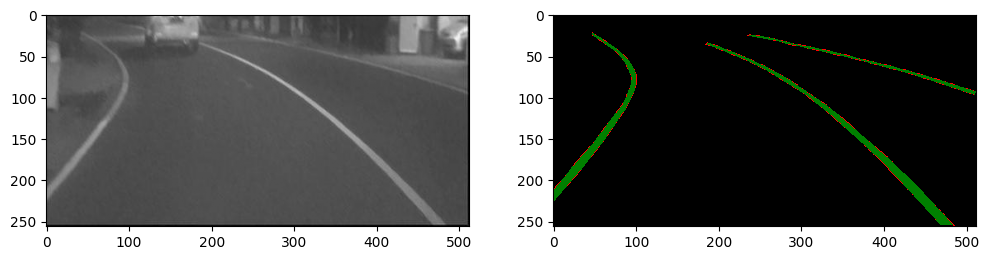

In [ ]:
import random
import numpy as np
image_number = random.randint(128, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
#plt.imshow(labels[image_number][:,:,0])
plt.imshow(labels[image_number][:,:,0], cmap=cmap)
plt.show()

In [ ]:
n_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)

In [ ]:
import segmentation_models as sm
weights = [0.5, 0.269, 0.231]
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)  #

IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [ ]:
#metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

Model UNet

In [ ]:

from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_vgg16_unet(input_shape):
    """ Input """
    inputs = Input(input_shape)

    """ Pre-trained VGG16 Model """
    vgg16 = VGG16(include_top=False, weights="imagenet", input_tensor=inputs)

    """ Encoder """
    s1 = vgg16.get_layer("block1_conv2").output         ## (512 x 512)
    s2 = vgg16.get_layer("block2_conv2").output         ## (256 x 256)
    s3 = vgg16.get_layer("block3_conv3").output         ## (128 x 128)
    s4 = vgg16.get_layer("block4_conv3").output         ## (64 x 64)

    """ Bridge """
    b1 = vgg16.get_layer("block5_conv3").output         ## (32 x 32)

    """ Decoder """
    d1 = decoder_block(b1, s4, 512)                     ## (64 x 64)
    d2 = decoder_block(d1, s3, 256)                     ## (128 x 128)
    d3 = decoder_block(d2, s2, 128)                     ## (256 x 256)
    d4 = decoder_block(d3, s1, 64)                      ## (512 x 512)

    """ Output """
    outputs = Conv2D(3, 1, padding="same", activation="softmax")(d4)

    model = Model(inputs, outputs, name="VGG16_U-Net")
    return model

if __name__ == "__main__":
    input_shape = (256, 512, 3)
    model = build_vgg16_unet(input_shape)
    #model.summary()


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU
import numpy as np

# Define the metrics
num_classes =  3
metrics = ['accuracy', MeanIoU(num_classes)]

def get_model():
    return build_vgg16_unet(input_shape)

model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)


In [ ]:
from keras.callbacks import LearningRateScheduler

learning_rate = 0.0001
epochs = 50
decay_rate = learning_rate / epochs
momentum = 0.8
batch_size = 8

def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate

# learning schedule callback
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [lr_rate]

history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=callbacks_list,
                        verbose=1,
                        validation_data=(X_test, y_test))


Epoch 1/50
500/500 [==============================] - 98s 135ms/step - loss: 0.2028 - accuracy: 0.9647 - mean_io_u: 0.3333 - val_loss: 0.0890 - val_accuracy: 0.9812 - val_mean_io_u: 0.3333 - lr: 1.0000e-04
Epoch 2/50
500/500 [==============================] - 63s 127ms/step - loss: 0.0749 - accuracy: 0.9842 - mean_io_u: 0.3333 - val_loss: 0.1013 - val_accuracy: 0.9828 - val_mean_io_u: 0.3333 - lr: 1.0000e-04
Epoch 3/50
500/500 [==============================] - 63s 127ms/step - loss: 0.0584 - accuracy: 0.9859 - mean_io_u: 0.3333 - val_loss: 0.0524 - val_accuracy: 0.9866 - val_mean_io_u: 0.3333 - lr: 1.0000e-04
Epoch 4/50
500/500 [==============================] - 64s 127ms/step - loss: 0.0475 - accuracy: 0.9877 - mean_io_u: 0.3333 - val_loss: 0.0441 - val_accuracy: 0.9883 - val_mean_io_u: 0.3333 - lr: 9.9999e-05
Epoch 5/50
500/500 [==============================] - 64s 127ms/step - loss: 0.0424 - accuracy: 0.9887 - mean_io_u: 0.3333 - val_loss: 0.0446 - val_accuracy: 0.9875 - val_mean_

In [ ]:
#Save Model
model.save("unet-50-512-revisi-wiener.hdf5")

In [ ]:
import pandas as pd
histU_df = pd.DataFrame(history.history)
histU_csv_file = 'history_unet_50epoch_512_revisi_wiener.csv'
with open(histU_csv_file, mode='w') as f:
    histU_df.to_csv(f)

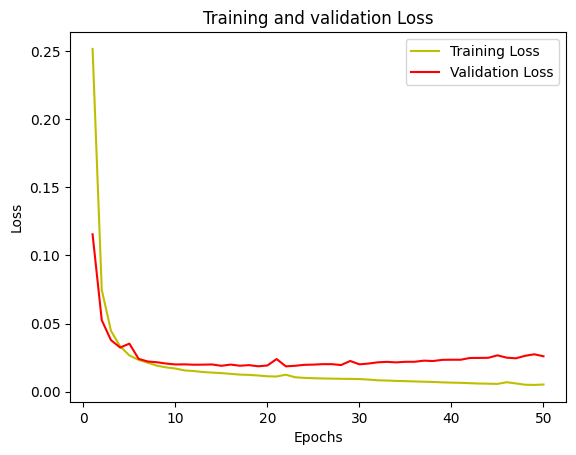

In [ ]:
history = history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

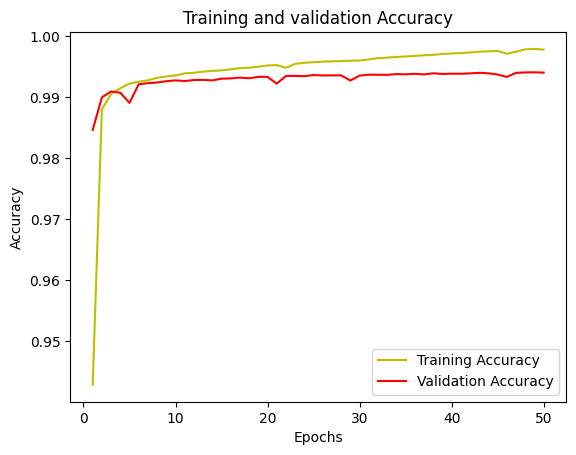

In [ ]:
history = history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model: SegNet

In [ ]:
#SegNet
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

#physical_devices = tf.config.list_physical_devices('GPU')
#print(physical_devices)
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Define the SegNet model
def create_segnet_model(input_shape, num_classes):
    model = Sequential()

    # Encoder
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Decoder
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

    # Output
    model.add(Conv2D(num_classes, (1, 1), padding='valid', activation='softmax'))

    return model

# Define the input shape and number of classes
input_shape = (256, 512, 3)
num_classes = 3

# Create the SegNet model
#with tf.device('/GPU:0'):
model = create_segnet_model(input_shape, num_classes)

# Round down the input shape dimensions to the nearest multiple of 32
input_shape = (input_shape[0] // 32 * 32, input_shape[1] // 32 * 32, input_shape[2])


In [ ]:
from tensorflow.keras.metrics import MeanIoU
import numpy as np

# Define the metrics
num_classes =  3
metrics = ['accuracy', MeanIoU(num_classes)]

# Assuming you have defined input_shape and num_classes before this point
def get_model():
    return create_segnet_model(input_shape, num_classes)

model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
# model.summary()

In [ ]:
from keras.callbacks import LearningRateScheduler

learning_rate = 0.0001
epochs = 50
decay_rate = learning_rate / epochs
momentum = 0.8
batch_size = 8

def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate

# learning schedule callback
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [lr_rate]

history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=callbacks_list,
                        verbose=1,
                        validation_data=(X_test, y_test))

Epoch 1/50
500/500 [==============================] - 72s 99ms/step - loss: 0.1332 - accuracy: 0.9727 - mean_io_u: 0.3343 - val_loss: 0.0732 - val_accuracy: 0.9788 - val_mean_io_u: 0.3333 - lr: 1.0000e-04
Epoch 2/50
500/500 [==============================] - 46s 91ms/step - loss: 0.0643 - accuracy: 0.9810 - mean_io_u: 0.3337 - val_loss: 0.0552 - val_accuracy: 0.9841 - val_mean_io_u: 0.3336 - lr: 1.0000e-04
Epoch 3/50
500/500 [==============================] - 46s 91ms/step - loss: 0.0517 - accuracy: 0.9848 - mean_io_u: 0.3341 - val_loss: 0.0495 - val_accuracy: 0.9853 - val_mean_io_u: 0.3334 - lr: 1.0000e-04
Epoch 4/50
500/500 [==============================] - 46s 91ms/step - loss: 0.0451 - accuracy: 0.9865 - mean_io_u: 0.3343 - val_loss: 0.0451 - val_accuracy: 0.9864 - val_mean_io_u: 0.3334 - lr: 9.9999e-05
Epoch 5/50
500/500 [==============================] - 46s 91ms/step - loss: 0.0414 - accuracy: 0.9873 - mean_io_u: 0.3384 - val_loss: 0.0421 - val_accuracy: 0.9873 - val_mean_io_u:

Epoch 1/50
453/453 [==============================] - 70s 107ms/step - loss: 0.1150 - accuracy: 0.9759 - mean_io_u_1: 0.3460 - false_positives_1: 9948764.0000 - true_positives_1: 456029664.0000 - val_loss: 0.0562 - val_accuracy: 0.9817 - val_mean_io_u_1: 0.3727 - val_false_positives_1: 1860431.0000 - val_true_positives_1: 116327792.0000 - lr: 1.0000e-04
Epoch 2/50
453/453 [==============================] - 42s 92ms/step - loss: 0.0414 - accuracy: 0.9857 - mean_io_u_1: 0.3808 - false_positives_1: 5733002.0000 - true_positives_1: 467050240.0000 - val_loss: 0.0327 - val_accuracy: 0.9886 - val_mean_io_u_1: 0.3721 - val_false_positives_1: 1273382.0000 - val_true_positives_1: 117319760.0000 - lr: 1.0000e-04
Epoch 3/50
453/453 [==============================] - 42s 92ms/step - loss: 0.0285 - accuracy: 0.9898 - mean_io_u_1: 0.4085 - false_positives_1: 4618669.0000 - true_positives_1: 469541088.0000 - val_loss: 0.0257 - val_accuracy: 0.9907 - val_mean_io_u_1: 0.3914 - val_false_positives_1: 106

In [ ]:
#Save Model
model.save("segnet-50-512-revisi-wiener.hdf5")

In [ ]:
import pandas as pd
histS_df = pd.DataFrame(history.history)
histS_csv_file = 'history_segnet_50epoch_512_revisi_wiener.csv'
with open(histS_csv_file, mode='w') as f:
    histS_df.to_csv(f)

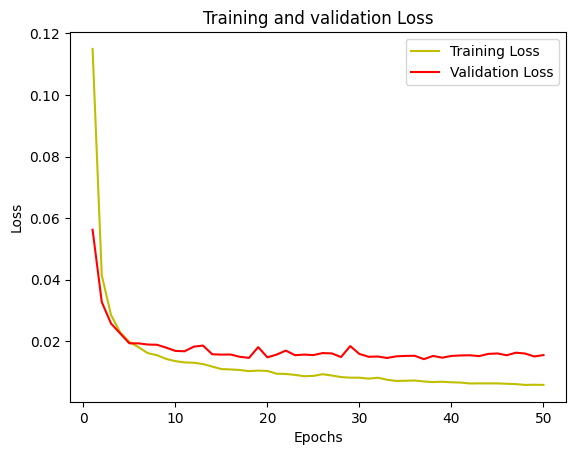

In [ ]:
history = history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

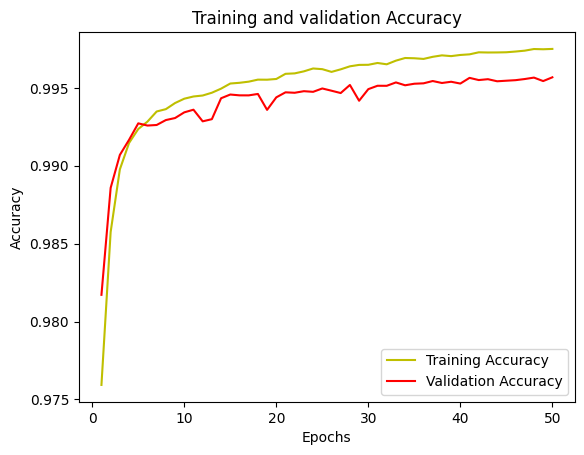

In [ ]:
history = history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

### FOR NOW LET US FOCUS ON A SINGLE MODEL

#Set compile=False as we are not loading it for training, only for prediction.
#model_unet = load_model('unet_res34_backbone_50epochs1.hdf5', compile=False)
model_segnet = load_model('segnet-50.h5', compile=False)

In [ ]:
y_pred_segnet=model_segnet.predict(X_test)
y_pred_segnet_argmax=np.argmax(y_pred_segnet, axis=3)

36/36 [==============================] - 2s 40ms/step


In [ ]:
from keras.metrics import MeanIoU
n_classes = 3

IOU_segnet = MeanIoU(num_classes=n_classes)
IOU_segnet.update_state(y_test[:,:,:,0], y_pred_segnet_argmax)


print("Mean IoU using Unet =", IOU_segnet.result().numpy())

Mean IoU using Unet = 0.0018328183


In [ ]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]

test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

1/1 [==============================] - 0s 23ms/step


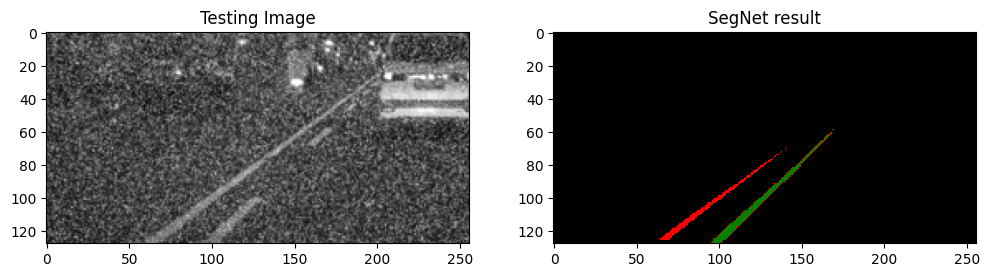

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
#plt.subplot(222)
#plt.title('Testing Label')
#plt.imshow(ground_truth[:,:,0], cmap=cmap)
plt.subplot(222)
plt.title('SegNet result')
plt.imshow(predicted_img, cmap=cmap)

Model: UNet

In [ ]:
BACKBONE = 'resnet34'
preprocess_input1 = sm.get_preprocessing(BACKBONE)

# preprocess input
X_train1 = preprocess_input1(X_train)
X_test1 = preprocess_input1(X_test)

In [ ]:
#model = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=3, activation='softmax')
model = sm.Unet(BACKBONE, classes=3, activation='softmax')

In [ ]:
LR = 0.0001
optim = keras.optimizers.Adam(LR)

model.compile(optim, total_loss, metrics=metrics)

#model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

#print(model.summary())

In [ ]:
from datetime import datetime
start1 = datetime.now()

history1=model.fit(X_train1,
          y_train,
          batch_size=8,
          epochs=50,
          verbose=1,
          validation_data=(X_test1, y_test))

stop1 = datetime.now()

In [ ]:
#Execution time of the model
execution_time_unet = stop1-start1
print("Unet execution time is: ", execution_time_unet)


model.save('unet_res34_backbone_50epochs1.hdf5')

In [ ]:
import pandas as pd
hist1_df = pd.DataFrame(history1.history)
hist1_csv_file = 'history_unet_50epochs1.csv'
with open(hist1_csv_file, mode='w') as f:
    hist1_df.to_csv(f)

In [ ]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history1.history['iou_score']
val_acc = history1.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

Predict

In [ ]:
from keras.models import load_model

### FOR NOW LET US FOCUS ON A SINGLE MODEL

#Set compile=False as we are not loading it for training, only for prediction.
model_unet = load_model('unet_res34_backbone_50epochs1.hdf5', compile=False)
#model_segnet = load_model('segnet-50.h5', compile=False)


In [ ]:
y_pred_unet=model_unet.predict(X_test1)
y_pred_unet_argmax=np.argmax(y_pred_unet, axis=3)

#y_pred_linknet=model_linknet.predict(X_test)
#y_pred_linknet_argmax=np.argmax(y_pred_linknet, axis=3)

In [ ]:
from keras.metrics import MeanIoU
n_classes = 3

IOU_unet = MeanIoU(num_classes=n_classes)
IOU_unet.update_state(y_test[:,:,:,0], y_pred_unet_argmax)


print("Mean IoU using Unet =", IOU_unet.result().numpy())



In [ ]:

import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
test_img_input1 = preprocess_input1(test_img_input)

test_pred_unet = model_unet.predict(test_img_input1)
test_prediction_unet = np.argmax(test_pred_unet, axis=3)[0,:,:]

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
#plt.subplot(222)
#plt.title('Testing Label')
#plt.imshow(ground_truth[:,:,0], cmap=cmap)
plt.subplot(222)
plt.title('Unet result')
plt.imshow(test_prediction_unet, cmap=cmap)

In [ ]:
model_unet = load_model('saved_models/unet_res34_backbone_50epochs.hdf5', compile=False)

from patchify import patchify, unpatchify

#Set compile=False as we are not loading it for training, only for prediction.
#model_unet = load_model('saved_models/unet_res34_backbone_50epochs.hdf5', compile=False)
#model_linknet = load_model('saved_models/linknet_res34_backbone_50epochs.hdf5', compile=False)

start3 = datetime.now()

segm_images = []
path = "50_large_images/*.tif"
from pathlib import Path
for file in glob.glob(path):
    #print(file)     #just stop here to see all file names printed
    name = Path(file).stem #Get the original file name
    #print(name)

    large_image = cv2.imread(file, 1)

    patches = patchify(large_image, (128, 128, 3), step=128)  #Step=256 for 256 patches means no overlap

    predicted_patches = []
    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
            print(i,j)

            single_patch = patches[i,j,0, :,:]

            single_patch = np.expand_dims(single_patch, 0)
            single_patch_input=preprocess_input1(single_patch)

            single_patch_prediction = (model_linknet.predict(single_patch_input))
            single_patch_predicted_img=np.argmax(single_patch_prediction, axis=3)[0,:,:]

            predicted_patches.append(single_patch_predicted_img)

    predicted_patches = np.array(predicted_patches)

    predicted_patches_reshaped = np.reshape(predicted_patches, (patches.shape[0], patches.shape[1], 128,128) )

    reconstructed_image = unpatchify(predicted_patches_reshaped, (large_image.shape[0], large_image.shape[1]))
    #Here you can save individual images, or save on milti_dim tiff file
    #cv2.imwrite('segmented_images/' + name + '_segmented.tif', reconstructed_image)
    segm_images.append(reconstructed_image)
    print("Finished segmenting image: ", name)


final_segm_image = np.array(segm_images).astype(np.uint8)

from tifffile import imsave
imsave('segmented_images/sandstone_segmented_test2.tif', final_segm_image)

stop3 = datetime.now()

#Execution time of the model
#prediction_time_unet = stop3-start3
prediction_time_linknet = stop3-start3
print("Linknet prediction time is: ", prediction_time_linknet)